<p align="center">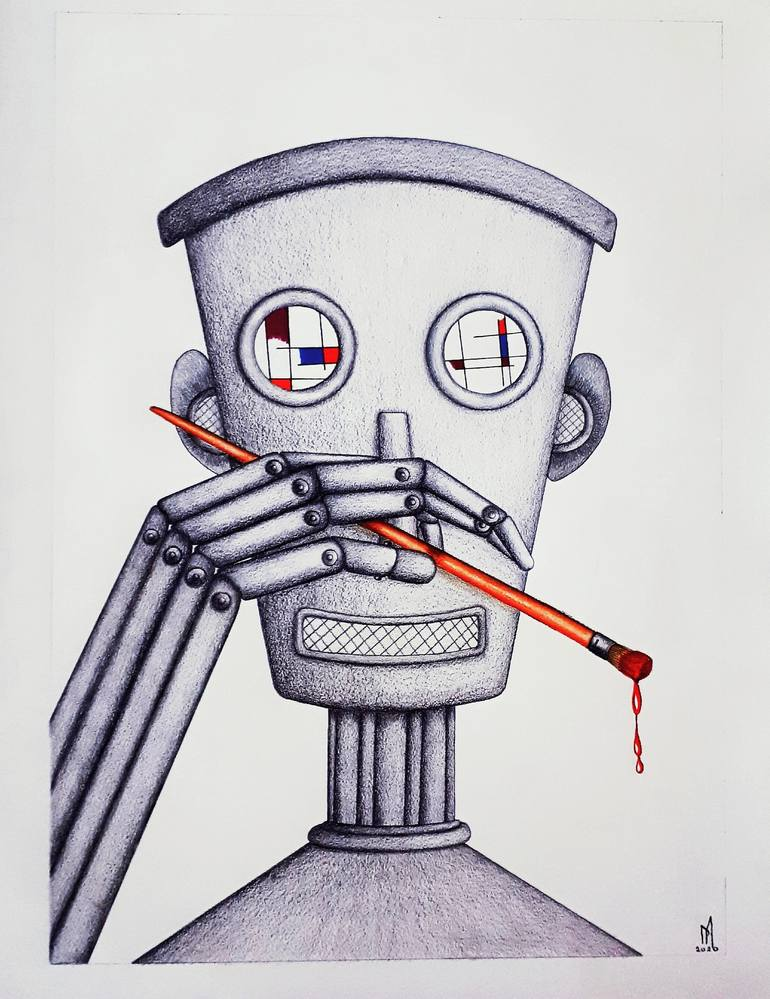</p>

# ChatBot super básico

In [ ]:
!pip install chatterbot
!pip install chatterbot_corpus

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer
from spacy.cli import download
from chatterbot.comparisons import LevenshteinDistance


download('es_core_news_sm') # en_core_web_sm
class ENGSM:
  ISO_639_1 = 'es_core_news_sm'



chatbot = ChatBot(
    'myBotcito',
    tagger_language = ENGSM,
    storage_adapter='chatterbot.storage.SQLStorageAdapter',
    database='./database.sqlite5', #fichero de la base de datos (si no existe se creará automáticamente)


    logic_adapters=[ 
        {
            "import_path": "chatterbot.logic.BestMatch",
            "statement_comparison_function": "chatterbot.comparisons.levenshtein_distance",
            # "response_selection_method": "chatterbot.response_selection.get_most_frequent_response"
        },
        'chatterbot.logic.MathematicalEvaluation', #Este es un logic_adapter que responde preguntas sobre matemáticas en inglés
        'chatterbot.logic.TimeLogicAdapter' #Este es un logic_adapter que responde preguntas sobre la hora actual en inglés
    ],
    preprocessors=['chatterbot.preprocessors.clean_whitespace'],
    statement_comparison_function=LevenshteinDistance

)



trainer = ChatterBotCorpusTrainer(chatbot)
trainer.train(
    # "/usr/local/lib/python3.7/dist-packages/chatterbot_corpus/data/english"
    "/usr/local/lib/python3.7/dist-packages/chatterbot_corpus/data/spanish"
    # "chatterbot.corpus.spanish"
)

# Usar un txt propio para entrenar el modelo
trainer.train("./PreguntasYRespuestas.yml")

# # Exportar los datos
# trainer.export_for_training('/my_export.json')



✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
Training conversations.yml: [####################] 100%
Training greetings.yml: [####################] 100%
Training trivia.yml: [####################] 100%
Training PreguntasYRespuestas.yml: [####################] 100%


In [ ]:
# chatbot.get_response('')

print('Mi nombre es Botcito ¿En qué puedo ayudarte?')

while True:
  message = input('\nTu mensaje: ')
  if message.lower() == 'chau':
    print ('\nBotcito: Buena suerte.')
    break
  response = chatbot.get_response(message)
  print('\nBotcito: ' + str(response))


Mi nombre es Botcito ¿En qué puedo ayudarte?

Tu mensaje: Hola

Botcito: Hola

Tu mensaje: ¿Cómo estás?

Botcito: Estoy bien.

Tu mensaje: ¿Sabes matemáticas?

Botcito: Un poco ¿Me quieres probar?

Tu mensaje: 2022 - 2000

Botcito: 2022 - 2000 = 22

Tu mensaje: 12 * 4

Botcito: 12 * 4 = 48

Tu mensaje: 2 ^ 10

Botcito: 2 ^ 10 = 1024

Tu mensaje: ¡Eres muy inteligente!

Botcito: ¡Seguramente tu también!

Tu mensaje: ¿sabes cuál es el nombre de la galacia principal más cercana a la vía láctea?

Botcito: Andrómeda.

Tu mensaje: ¿sabes inglés?

Botcito: Un poco. Por ejemplo, puedo decir la hora.

Tu mensaje: what time is it?

Botcito: The current time is 08:48 PM

Tu mensaje: Chau

Botcito: Buena suerte.


# DEPRECATED LIBRARY:
## Chatterbot 7

In [ ]:

# from chatterbot import ChatBot
# from chatterbot.trainers import ListTrainer
# from chatterbot.comparisons import JaccardSimilarity
# from chatterbot.comparisons import LevenshteinDistance
# from chatterbot.conversation import Statement


# # from spacy.cli import download
# # download('es_core_news_sm') #en_cor_web_sm
# # class ENGSM:
# #   iso_639_1 = 'es_core_news_sm'


# #Descomentar estas lineas sólo la primera vez que se ejecute el algoritmo para instalar los componentes que falten.
# #Luego se pueden volver a comentar

# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

# #Creo una instancia de la clase ChatBot
# chatbot = ChatBot(
#     'Xpikuos',
#     storage_adapter='chatterbot.storage.SQLStorageAdapter',
#     database='./database.sqlite5', #fichero de la base de datos (si no existe se creará automáticamente)
    
#     input_adapter='chatterbot.input.TerminalAdapter', #indica que la pregunta se toma del terminal
#     output_adapter='chatterbot.output.TerminalAdapter', #indeica que la respuesta se saca por el terminal
    
#     trainer='chatterbot.trainers.ListTrainer',
    
#     #Un Logic_adapter es una clase que devuelve una respuesta ante una pregunta dada. 
#     #Se pueden usar tantos logic_adapters como se quiera
#     logic_adapters=[ 
#         #'chatterbot.logic.MathematicalEvaluation', #Este es un logic_adapter que responde preguntas sobre matemáticas en inglés
#         #'chatterbot.logic.TimeLogicAdapter', #Este es un logic_adapter que responde preguntas sobre la hora actual en inglés
        
#         {
#             "import_path": "chatterbot.logic.BestMatch",
#             "statement_comparison_function": "chatterbot.comparisons.levenshtein_distance",
#             "response_selection_method": "chatterbot.response_selection.get_most_frequent_response"
#         }
#         #{
#         #    'import_path': 'chatterbot.logic.LowConfidenceAdapter',
#         #    'threshold': 0.51,
#         #    'default_response': 'Disculpa, no te he entendido bien. ¿Puedes ser más específico?.'
#         #},
#         #{
#         #    'import_path': 'chatterbot.logic.SpecificResponseAdapter',
#         #    'input_text': 'Eso es todo',
#         #    'output_text': 'Perfecto. Hasta la próxima'
#         #},
#     ],
    
#         preprocessors=[
#         'chatterbot.preprocessors.clean_whitespace'
#     ],
    
#     #read_only=True,
# statement_comparison_function=LevenshteinDistance

# )

# # DEFAULT_SESSION_ID = chatbot.default_session
# DEFAULT_SESSION_ID = chatbot.generate_response


In [ ]:
# trainer = ListTrainer(chatbot)
# trainer.train('chatterbot.corpus.spanish')
# # trainer.train("./PreguntasYRespuestas.yml")
# trainer.train([
#    '¿Cómo estás?',
#    'Bien.',
#    'Me alegro.',
#    'Gracias.',
#    'De nada.',
#    '¿Y tú?'
# ])

# #Elegir la forma de medir la similitud entre dos frases
# # levenshtein_distance = LevenshteinDistance()
# #synset_distance = SynsetDistance()
# #sentiment_comparison = SentimentComparison()
# #jaccard_similarity = JaccardSimilarity()

# disparate=Statement('se te ha ido la pinza')#convertimos una frase en un tipo statement
# entradaDelUsuario="" #variable que contendrá lo que haya escrito el usuario
# entradaDelUsuarioAnterior=""

# while entradaDelUsuario!="adios":
#     # entradaDelUsuario = chatbot.input.process_input_statement() #leemos la entrada del usuario
#     entradaDelUsuario = input('Tu mensaje: ')
#     # statement, respuesta = chatbot.generate_response(entradaDelUsuario, DEFAULT_SESSION_ID)
#     respuesta = chatbot.get_response(entradaDelUsuario)

#     # if levenshtein_distance.compare(entradaDelUsuario,disparate)>0.51:
#     #     print('¿Qué debería haber dicho?')
#     #     entradaDelUsuarioCorreccion = chatbot.input.process_input_statement()
#     #     chatbot.train([entradaDelUsuarioAnterior.text,entradaDelUsuarioCorreccion.text])
#     #     print("He aprendiendo que cuando digas {} debo responder {}".format(entradaDelUsuarioAnterior.text,entradaDelUsuarioCorreccion.text))
    
#     entradaDelUsuarioAnterior=entradaDelUsuario
#     #print(statement) #statement contiene el mismo valor que entradaDelUsuario
#     print("\n%s\n\n" % respuesta)